# Quick Parameter Check

In this notebook, you can quickly see the overview of how different cluster search parameters affect your results. It uses [PosgenPy](https://github.com/PrzemyslawKlups/posgenpy.git) which is a simple python drive for [POSGEN](http://apttools.sourceforge.net). 

It will iterate through given values, creating necessary files in the designated folder and run Maximum Separation Method for cluster search. For correct estimation of the real to random clusters in your data, each analysis will be run with additional of 5 (or more) relabelled runs. The graphs from [Williams et al. 2013](https://doi.org/10.1016/j.ultramic.2012.12.011) paper will be reproduced on your data and correct value for $N_{min}$ will be found. You will be able to see the average cluster composition for each value of the parameter that you selected for iteration and see how its affected by it.

In the first step, we'll go through different $d_{max}$ values. Cells which require your input start just like the one below 

In [1]:
######################### INPUT REQUIRED #########################
your_input = "Example"

In [2]:
import posgenpy as pgp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import subprocess
import pandas
import time
import sys

In [3]:
######################### INPUT REQUIRED #########################

output_folder = "/home/pklups/posgenpy/examples/" # put "/" at the end
posgen_folder = "/home/pklups/apttools-posgen-code/" # put "/" at the end
pos_file_path= "/home/pklups/posgenpy/posgenpyTest_easy.pos" 
range_file_path="/home/pklups/posgenpy/examples/posgenpyTest.rrng" 
random_runs = 20
dtd_location = "/home/pklups/apttools-posgen-code/"
core_ions = ["Cu", "Ni"]
bulk_ions = ["Fe"]

In [4]:

#Check for pos file existing, 
if not os.path.isfile(pos_file_path) and not len(pos_file_path):
    #This is hard-coded in the XML file. Could switch to -pos generation.
    pos_file_path = "posgenpyTest_easy.pos"

    #Generate the file using the example
    print('Generating synthetic pos input')

    if not subprocess.call([posgen_folder+"posgen", output_folder+"generateTestPos_easy.xml"]) == 0:
        print('Generating example pos using posgen failed')
        assert(False)
    else:
        print('Complete')
    
    range_file_path="examples/posgenpyTest.rrng"
        
else:
    print("File found")


if not os.path.isfile(pos_file_path):
    print(f'input pos file not found {pos_file_path}')
    assert(False)

File found


Quick fix: change the location of the dtd file in the xml file manually. In my case, the first line of posgen:
```<!DOCTYPE posscript SYSTEM "/home/pklups/apttools-posgen-code/posscript.dtd">```

### Iterate through multiple dmax values with random data

In [5]:
######################### INPUT REQUIRED #########################

# add or remove values in this list
# you can also create the same list for different parameter
dmax_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

In [6]:
xml_files = []
output_basename="output_{i}_dmax_{dm}"

for i, dm in enumerate(dmax_values):
    thisName = output_basename.format(i=i,dm=dm)
    xml_output = pgp.write_xml_with_relabelling(xmlFileName=thisName,
                                                posFile=pos_file_path,
                                                rangeFile=range_file_path,
                                                coreIons=core_ions,
                                                bulkIons=bulk_ions,
                                                relabelled_runs=random_runs,
                                                destination_folder=output_folder,
                                                nminV=2,
                                                dmax=dm,
                                                dtd_file_location=dtd_location
                                  )
    output_file = output_folder + str(thisName) + ".xml"
    xml_files.append(output_file)

In [7]:
for x in xml_files:
    print(x)

/home/pklups/posgenpy/examples/output_0_dmax_0.2.xml
/home/pklups/posgenpy/examples/output_1_dmax_0.3.xml
/home/pklups/posgenpy/examples/output_2_dmax_0.4.xml
/home/pklups/posgenpy/examples/output_3_dmax_0.5.xml
/home/pklups/posgenpy/examples/output_4_dmax_0.6.xml
/home/pklups/posgenpy/examples/output_5_dmax_0.7.xml


In [8]:
os.chdir(posgen_folder)
current_directory = os.getcwd()
os.chdir(posgen_folder)
print(os.getcwd())

for i, xml_file in enumerate(xml_files):
    posgen_output = subprocess.call(["./posgen", xml_file])
    print(f"File {i+1}/{len(xml_files)} analysed")
    
os.chdir(current_directory)
print(os.getcwd())

/home/pklups/apttools-posgen-code
File 1/6 analysed
File 2/6 analysed
File 3/6 analysed
File 4/6 analysed
File 5/6 analysed
File 6/6 analysed
/home/pklups/apttools-posgen-code


### Plotting threshold value
$(N_{real} - N_{rand})/N_{real}$

(0.5, 1.05)

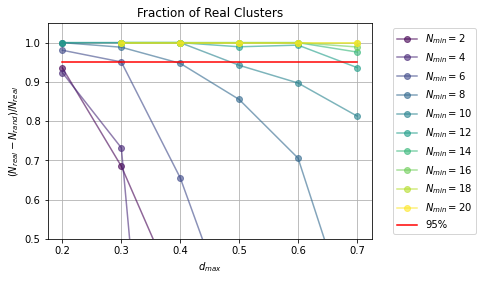

In [9]:
n_min_values = list(range(2, 21, 2))

pgp.plot_real_cluster_ratio_across_swept_param(
    swept_parameters=dmax_values,
    swept_parameter_name="$d_{max}$",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=n_min_values
)

plt.ylim(0.5, 1.05)

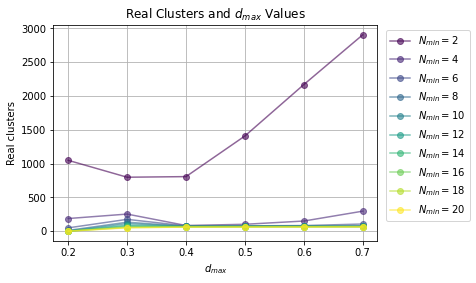

In [10]:
pgp.plot_real_clusters_across_swept_param(
    swept_parameters=dmax_values,
    swept_parameter_name="$d_{max}$",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=n_min_values
)

## Find optimal N_min

Find the smallest $N_{min}$ value for each file that satisfies given threshold of real clusters. Default value = 95%

In [11]:
optimal_n_min_values = pgp.find_smallest_nmin(
    swept_parameters=dmax_values,
    swept_parameter_name="d_max",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=list(range(1, 100, 1)) # go through evey n_min possible up to a high number
)

print(optimal_n_min_values)

d_max: 0.2 | n_min: 5 | ratio: 0.961413043478261
d_max: 0.3 | n_min: 6 | ratio: 0.9508571428571428
d_max: 0.4 | n_min: 9 | ratio: 0.9923611111111111
d_max: 0.5 | n_min: 11 | ratio: 0.9753521126760564
d_max: 0.6 | n_min: 11 | ratio: 0.9605633802816902
d_max: 0.7 | n_min: 14 | ratio: 0.976086956521739
[5, 6, 9, 11, 11, 14]


## Plotting cluster composition 

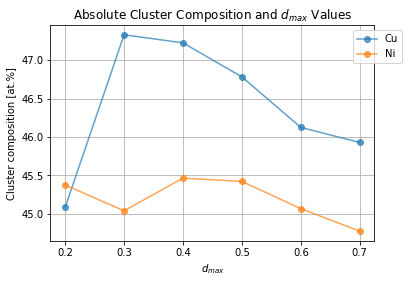

In [12]:
# retrieve the data needed from the cluster stats files for the composition plots
pgp.plot_cluster_composition_across_swept_param_absolute(
    swept_parameters=dmax_values,
    core_ions=core_ions,
    xml_files=xml_files,
    n_min_values_for_swept_parameters=optimal_n_min_values,
    swept_parameter_name="$d_{max}$",
    exclude_ions=None
)

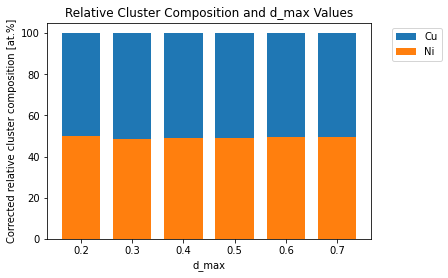

In [13]:
pgp.plot_cluster_composition_across_swept_param_relative(
    swept_parameters=dmax_values,
    core_ions=core_ions,
    xml_files=xml_files,
    n_min_values_for_swept_parameters=optimal_n_min_values,
    swept_parameter_name="d_max",
    exclude_ions=None
)

## What to do next?

If you're happy with your dmax selection, you can do the same parameter check but with order (kNN) values.

In [14]:
######################### INPUT REQUIRED #########################

# add or remove values in this list
# you can also create the same list for different parameter
order_values = [2, 3, 4, 5, 6, 7]
d_max = 0.5 # select dmax, hopefully the graphs above can help

In [15]:
xml_files = []
output_basename="output_{i}_order_{order}"

for i, param_value in enumerate(order_values):
    thisName = output_basename.format(i=i,order=param_value)
    xml_output = pgp.write_xml_with_relabelling(xmlFileName=thisName,
                                                posFile=pos_file_path,
                                                rangeFile=range_file_path,
                                                coreIons=core_ions,
                                                bulkIons=bulk_ions,
                                                relabelled_runs=random_runs,
                                                destination_folder=output_folder,
                                                nminV=2,
                                                dmax=d_max,
                                                dtd_file_location=dtd_location,
                                                dclassify=d_max,
                                                knn=param_value
                                                
                                  )
    output_file = output_folder + str(thisName) + ".xml"
    xml_files.append(output_file)

In [16]:
# check if the xml files have been created
for x in xml_files:
    print(x)

/home/pklups/posgenpy/examples/output_0_order_2.xml
/home/pklups/posgenpy/examples/output_1_order_3.xml
/home/pklups/posgenpy/examples/output_2_order_4.xml
/home/pklups/posgenpy/examples/output_3_order_5.xml
/home/pklups/posgenpy/examples/output_4_order_6.xml
/home/pklups/posgenpy/examples/output_5_order_7.xml


In [17]:
os.chdir("/home/pklups/posgenpy/")
current_directory = os.getcwd()
os.chdir(posgen_folder)
print(os.getcwd())

for i, xml_file in enumerate(xml_files):
    posgen_output = subprocess.call(["./posgen", xml_file])
    print(f"File {i+1}/{len(xml_files)} analysed")
    
os.chdir(current_directory)
print(os.getcwd())

/home/pklups/apttools-posgen-code
File 1/6 analysed
File 2/6 analysed
File 3/6 analysed
File 4/6 analysed
File 5/6 analysed
File 6/6 analysed
/home/pklups/posgenpy


### Plotting threshold value
$(N_{real} - N_{rand})/N_{real}$

(0.5, 1.05)

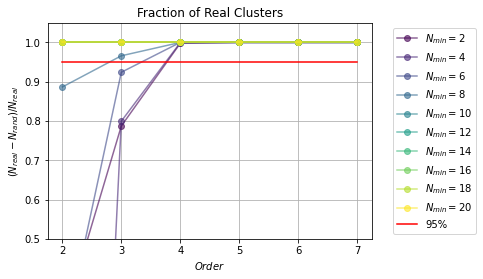

In [18]:
n_min_values = list(range(2, 21, 2))

pgp.plot_real_cluster_ratio_across_swept_param(
    swept_parameters=order_values,
    swept_parameter_name="$Order$",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=n_min_values
)

plt.ylim(0.5, 1.05)

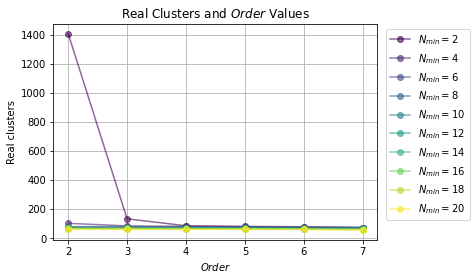

In [19]:
pgp.plot_real_clusters_across_swept_param(
    swept_parameters=order_values,
    swept_parameter_name="$Order$",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=n_min_values
)

## Find optimal N_min

Find the smallest $N_{min}$ value for each file that satisfies given threshold of real clusters. Default value = 95%

In [20]:
optimal_n_min_values = pgp.find_smallest_nmin(
    swept_parameters=order_values,
    swept_parameter_name="order",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=list(range(1, 100, 1)) # go through evey n_min possible up to a high number
)

print(optimal_n_min_values)

order: 2 | n_min: 9 | ratio: 0.9797297297297297
order: 3 | n_min: 8 | ratio: 0.9660000000000001
order: 4 | n_min: 1 | ratio: 0.9976470588235293
order: 5 | n_min: 1 | ratio: 1.0
order: 6 | n_min: 1 | ratio: 1.0
order: 7 | n_min: 1 | ratio: 1.0
[9, 8, 1, 1, 1, 1]


## Plotting cluster composition

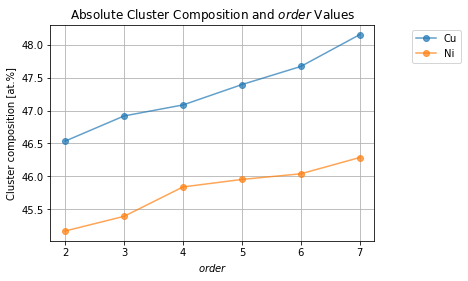

In [21]:
# retrieve the data needed from the cluster stats files for the composition plots
pgp.plot_cluster_composition_across_swept_param_absolute(
    swept_parameters=order_values,
    core_ions=core_ions,
    xml_files=xml_files,
    n_min_values_for_swept_parameters=optimal_n_min_values,
    swept_parameter_name="$order$",
    exclude_ions=None
)

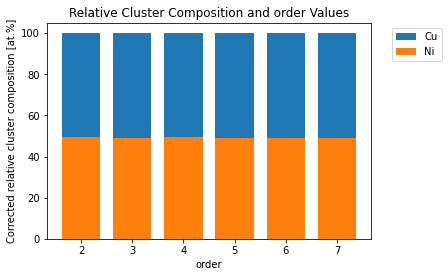

In [22]:
pgp.plot_cluster_composition_across_swept_param_relative(
    swept_parameters=order_values,
    core_ions=core_ions,
    xml_files=xml_files,
    n_min_values_for_swept_parameters=optimal_n_min_values,
    swept_parameter_name="order",
    exclude_ions=None
)

### Saving images

If you would like to save any of the graphs plotted above, insert this line at the bottom of the cell:
`plt.savefig("examples/name_of_the_plot.png", dpi=300)`.